In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
data_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
train = data_train.drop('Id', axis=1)
test = data_test.drop('Id', axis=1)

In [4]:
df = pd.concat([train.assign(ind="train"), test.assign(ind="test")])

In [5]:
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0,train
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0,train
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0,train
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0,train
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0,train


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [7]:
#Statistik untuk kolom yang numeric dari dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


Text(0.5, 1.0, 'Korelasi antar Fitur')

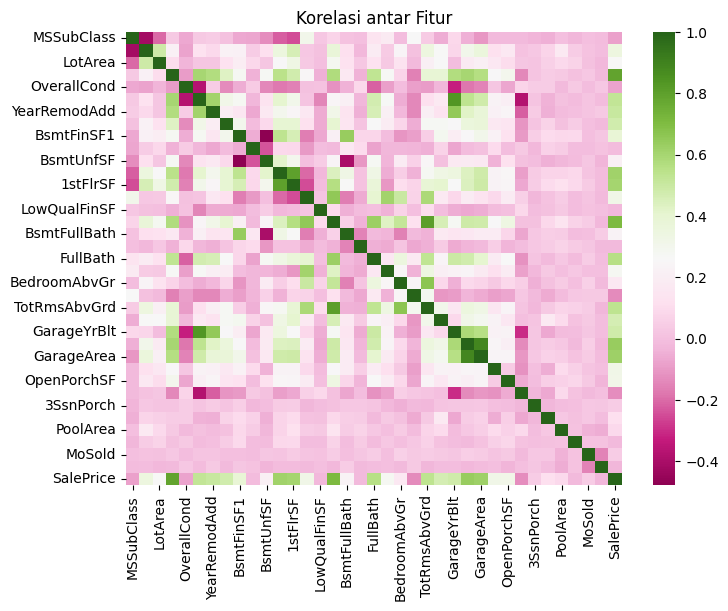

In [8]:
#Visualisasi Heatmap
plt.figure(figsize=(8,6), dpi=100)
sns.heatmap(df.corr(), cmap='PiYG')
plt.title("Korelasi antar Fitur")

In [9]:
#Korelasi antara SalePrice dan kolom Fitur
SalePrice_corr = df.corr()['SalePrice'].sort_values()[:-1]
print(f'Korelasi antara SalePrice dengan Fitur: \n\n{SalePrice_corr}')

Korelasi antara SalePrice dengan Fitur: 

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
Name: SalePrice, dtype

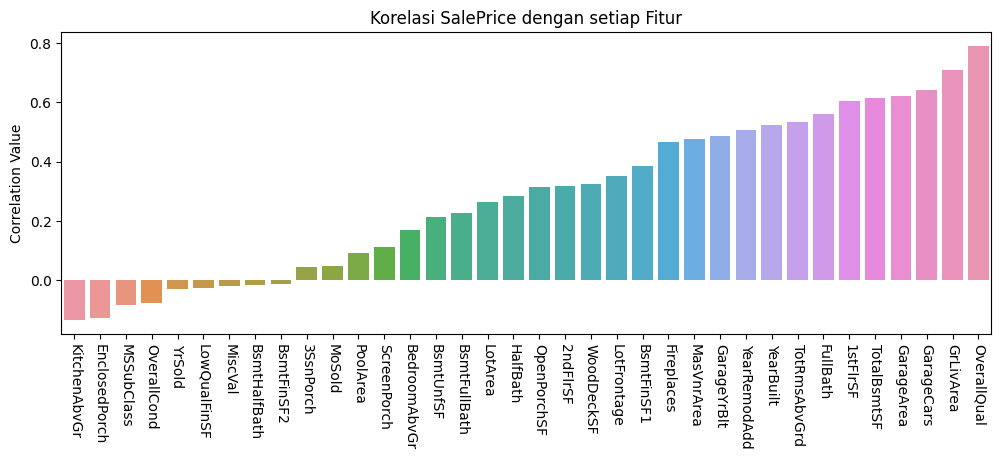

In [10]:
#Plot korelasi dari SalePrice dengan Fitur Lain
fig, ax = plt.subplots(figsize=(12,4), dpi=100)
ax = sns.barplot(x=SalePrice_corr.index, y=SalePrice_corr.values)

plt.title("Korelasi SalePrice dengan setiap Fitur")
plt.ylabel("Correlation Value")
plt.xticks(rotation=270);

Text(0.5, 1.0, 'Distribusi SalePrice')

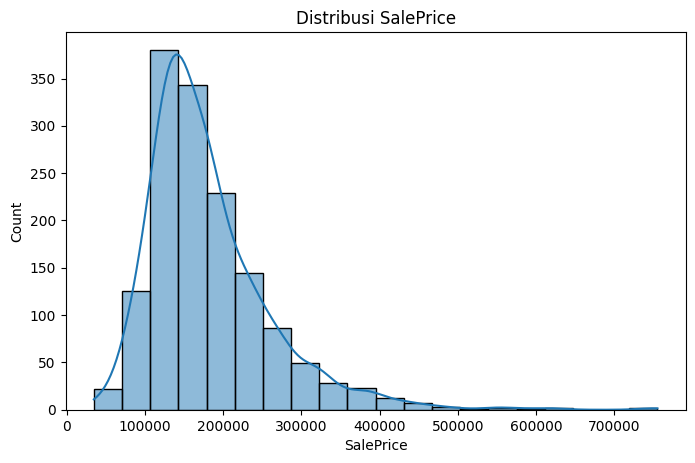

In [11]:
#plot distribusi dari SalePrice
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
ax = sns.histplot(df['SalePrice'], bins=20, kde=True)
plt.title("Distribusi SalePrice")

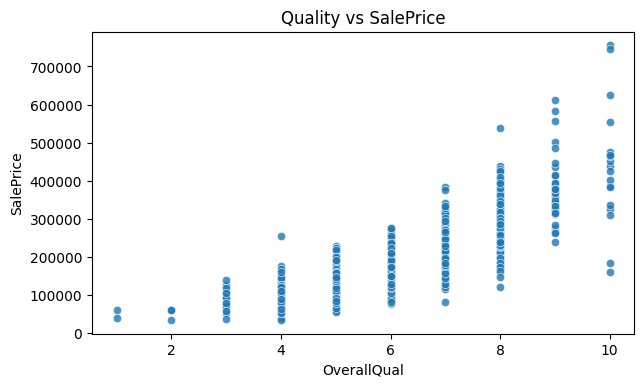

In [12]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.scatterplot(data=df, y='SalePrice', x='OverallQual', alpha=0.8)
plt.title("Quality vs SalePrice");

In [13]:
#Menemukan Outliers
df[(df['OverallQual'] > 8) & (df['SalePrice'] < 200000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,NaN,NaN,NaN,0,10,2007,New,Partial,184750.0,train
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000.0,train


Text(0.5, 1.0, 'Living Area vs SalePrice')

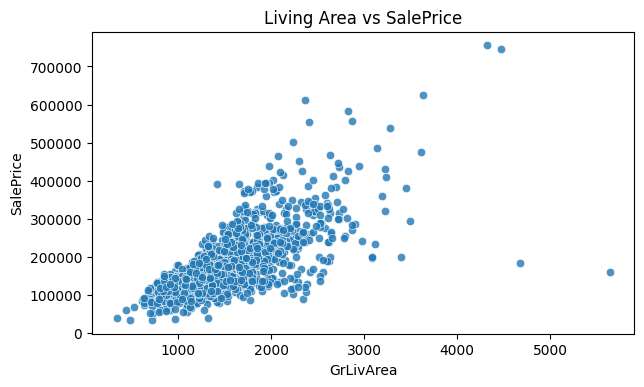

In [14]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.scatterplot(data=df, y='SalePrice', x='GrLivArea', alpha=0.8)
plt.title("Living Area vs SalePrice")

In [15]:
df[((df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,NaN,NaN,NaN,0,10,2007,New,Partial,184750.0,train
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000.0,train


In [16]:
#Menghapus sebagai distort predictions
df = df[~((df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000))]
print("DataFrame Baru adalah: ", df.shape)

DataFrame Baru adalah:  (2917, 81)


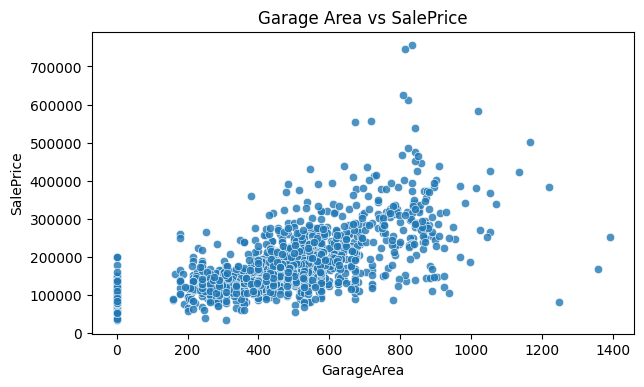

In [17]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.scatterplot(data=df, y='SalePrice', x='GarageArea', alpha=0.8)
plt.title("Garage Area vs SalePrice");

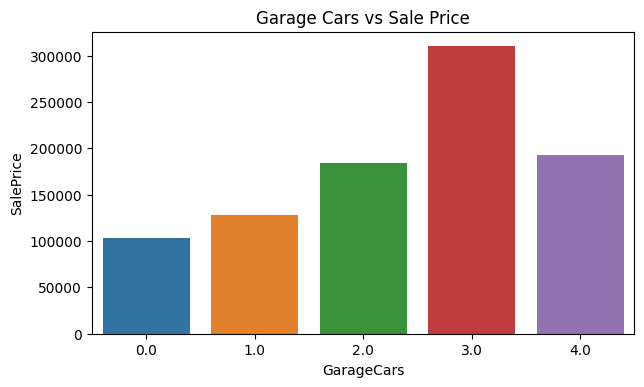

In [18]:
# Plot Garage Cars vs Sale Price
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.barplot(data=df, y='SalePrice', x='GarageCars', ci=0)
plt.title("Garage Cars vs Sale Price")
plt.xlim(-0.5, 4.5);

In [19]:
#Menampilkan angka dari null values untuk setiap fitur
df.isnull().sum().sort_values()

MSSubClass        0
Heating           0
HeatingQC         0
1stFlrSF          0
2ndFlrSF          0
               ... 
SalePrice      1459
Fence          2346
Alley          2719
MiscFeature    2812
PoolQC         2908
Length: 81, dtype: int64

In [20]:
# Function untuk menghitung persentasi dari missing values
def null_perc(df):
    df = df.drop('SalePrice', axis=1)
    null_data_perc = 100 * df.isna().mean()
    null_data_perc = null_data_perc[null_data_perc > 0].sort_values()
    
    return null_data_perc

# Function untuk menghitung missing values dari setiap kolom
def null_count(df):
    df = df.drop('SalePrice', axis=1)
    null_data_count = df.isnull().sum()
    null_data_count = null_data_count[null_data_count > 0].sort_values()
    return null_data_count

# Display the percentage of NaN for each feature
print('Persentasi missing Values dari setiap kolom:\n')
print(null_perc(df))

Persentasi missing Values dari setiap kolom:

TotalBsmtSF      0.034282
GarageArea       0.034282
GarageCars       0.034282
KitchenQual      0.034282
Electrical       0.034282
BsmtUnfSF        0.034282
BsmtFinSF2       0.034282
BsmtFinSF1       0.034282
SaleType         0.034282
Exterior1st      0.034282
Exterior2nd      0.034282
Functional       0.068564
Utilities        0.068564
BsmtHalfBath     0.068564
BsmtFullBath     0.068564
MSZoning         0.137127
MasVnrArea       0.788481
MasVnrType       0.822763
BsmtFinType1     2.708262
BsmtFinType2     2.742544
BsmtQual         2.776826
BsmtCond         2.811107
BsmtExposure     2.811107
GarageType       5.382242
GarageCond       5.450806
GarageQual       5.450806
GarageYrBlt      5.450806
GarageFinish     5.450806
LotFrontage     16.660953
FireplaceQu     48.680151
Fence           80.425094
Alley           93.212204
MiscFeature     96.400411
PoolQC          99.691464
dtype: float64


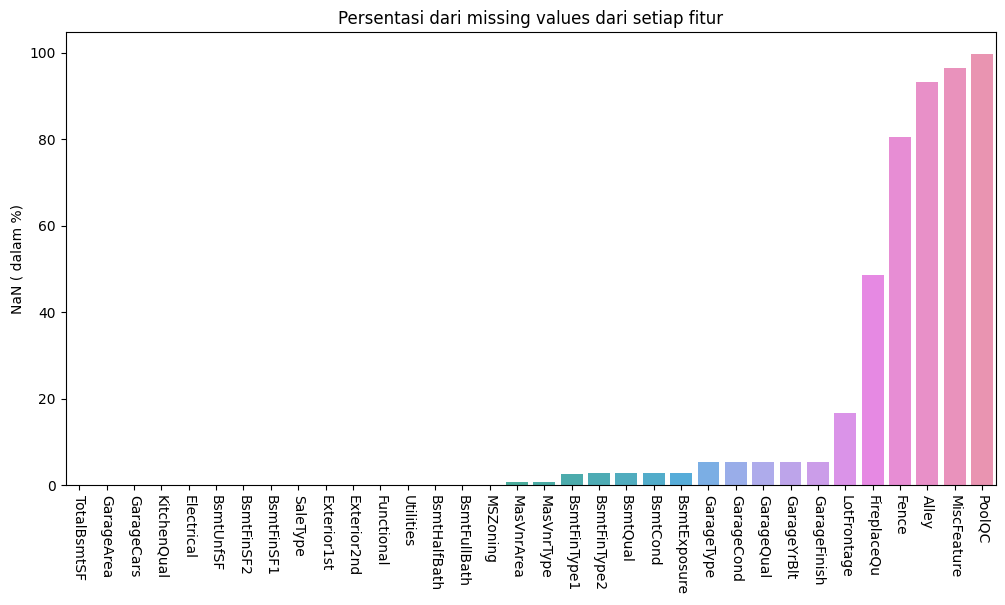

In [21]:
# Persentasi dari missing values dari setiap fitur
plt.figure(figsize=(12,6), dpi=100)
sns.barplot(x=null_perc(df).index, y=null_perc(df).values)
plt.title('Persentasi dari missing values dari setiap fitur')
plt.ylabel('NaN ( dalam %)')
plt.xticks(rotation=270);

In [22]:
#Menampilkan datafframe untuk MaVnrType
df[df['MasVnrType'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
234,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,5,2010,WD,Normal,216500.0,train
529,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624.0,train
650,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,5,2008,WD,Normal,205950.0,train
936,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2009,WD,Normal,184900.0,train
973,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,12,2008,New,Partial,182000.0,train
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,11,2007,New,Partial,199900.0,train
1243,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2006,New,Partial,465000.0,train
1278,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,3,2008,WD,Normal,237000.0,train
231,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,7,2009,WD,Normal,NaN,test
246,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,10,2009,New,Partial,NaN,test


In [23]:
df['MasVnrType'] = df['MasVnrType'].fillna('NA')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0.0)

In [24]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

print(f'Updated - Jumlah Missing values untuk setiap fitur: \n\n{null_count(df)}')

Updated - Jumlah Missing values untuk setiap fitur: 

SaleType           1
GarageArea         1
GarageCars         1
Exterior1st        1
Exterior2nd        1
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
BsmtFinSF2         1
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
MSZoning           4
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtCond          82
BsmtExposure      82
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
LotFrontage      486
FireplaceQu     1420
Fence           2346
Alley           2719
MiscFeature     2812
PoolQC          2908
dtype: int64


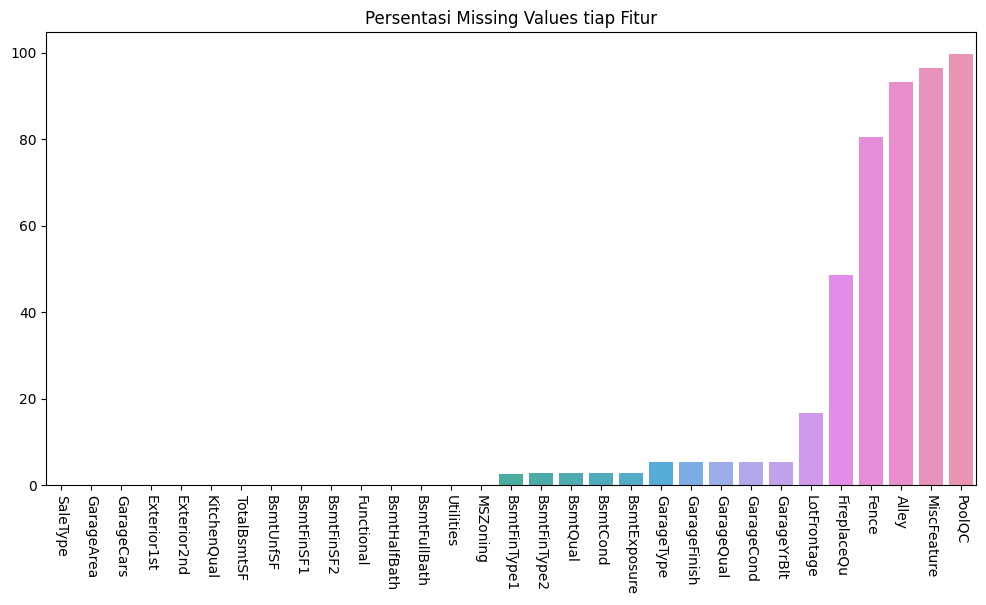

In [25]:
plt.figure(figsize=(12,6), dpi=100)
sns.barplot(x=null_perc(df).index, y=null_perc(df).values)
plt.title('Persentasi Missing Values tiap Fitur')
plt.xticks(rotation=270);

In [26]:
basement_nan_str_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[basement_nan_str_cols] = df[basement_nan_str_cols].fillna('NA')

garage_nan_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[garage_nan_str_cols] = df[garage_nan_str_cols].fillna('NA')

In [27]:
df[df['YearBuilt'] == df['YearRemodAdd']].shape

(1559, 81)

In [28]:
df[(df['YearBuilt'] == df['YearRemodAdd']) & (df['YearBuilt'] == df['GarageYrBlt'])].shape

(1372, 81)

In [29]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearRemodAdd'])

In [30]:
df[df['GarageArea'].isnull() == True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
1116,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,NaN,test


In [31]:
df[['GarageArea', 'GarageCars']] = df[['GarageArea', 'GarageCars']].fillna(0.0)

In [32]:
basement_nan_num_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

df[basement_nan_num_cols] = df[basement_nan_num_cols].fillna(0.0)

df[df['BsmtFullBath'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
660,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN,test
728,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,7,2008,WD,Normal,NaN,test


In [33]:
df[['BsmtFullBath', 'BsmtHalfBath']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtFullBath  2915 non-null   float64
 1   BsmtHalfBath  2915 non-null   float64
dtypes: float64(2)
memory usage: 132.9 KB


In [34]:
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0.0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0.0)

In [35]:
# Cek berapa banyak rumah dengan tidak memiliki fireplace dan
# menampilkan jumlah missing values tiap fitur kolom
print("Jumlah rumah tanpa fireplace : ", df[df['Fireplaces'] == 0].shape[0])
print("---"*20)
print(f'Jumlah kolom values yang missing values (Updated) :\n\n{null_count(df)}')

Jumlah rumah tanpa fireplace :  1420
------------------------------------------------------------
Jumlah kolom values yang missing values (Updated) :

Exterior1st       1
Exterior2nd       1
KitchenQual       1
SaleType          1
Utilities         2
Functional        2
MSZoning          4
LotFrontage     486
FireplaceQu    1420
Fence          2346
Alley          2719
MiscFeature    2812
PoolQC         2908
dtype: int64


In [36]:
# Fitur Fireplace dengan 0 fireplace akan diganti dengan 'NA'
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')

In [37]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

print(f'Updated Jumlah dari kolom yang Missing Values :\n\n{null_count(df)}')

Updated Jumlah dari kolom yang Missing Values :

Utilities         2
Functional        2
MSZoning          4
LotFrontage     486
Fence          2346
Alley          2719
MiscFeature    2812
PoolQC         2908
dtype: int64


**POOL**

In [38]:
df[df['PoolArea'] == 0].shape

(2905, 81)

In [39]:
df[df['PoolArea'] != 0][['PoolArea', 'PoolQC', 'ind']]

,PoolArea,PoolQC,ind
197,512,Ex,train
810,648,Fa,train
1170,576,Gd,train
1182,555,Ex,train
1386,519,Fa,train
1423,738,Gd,train
514,144,Ex,test
960,368,NaN,test
1043,444,NaN,test
1113,228,Ex,test


In [40]:
df[(df['PoolArea'] == 0) & (df['PoolQC'].isnull())].shape

(2905, 81)

In [41]:
poolqc_freq = df['PoolQC'].mode()[0]

mask = (df['PoolArea'] != 0) & (df['PoolQC'].isnull())

df.loc[mask, 'PoolQC'] = df.loc[mask, 'PoolQC'].fillna(poolqc_freq)

In [42]:
df['PoolQC'] = df['PoolQC'].fillna('NA')

print(f'Updated Jumlah kolom yang Missing Values :\n\n{null_count(df)}')

Updated Jumlah kolom yang Missing Values :

Utilities         2
Functional        2
MSZoning          4
LotFrontage     486
Fence          2346
Alley          2719
MiscFeature    2812
dtype: int64


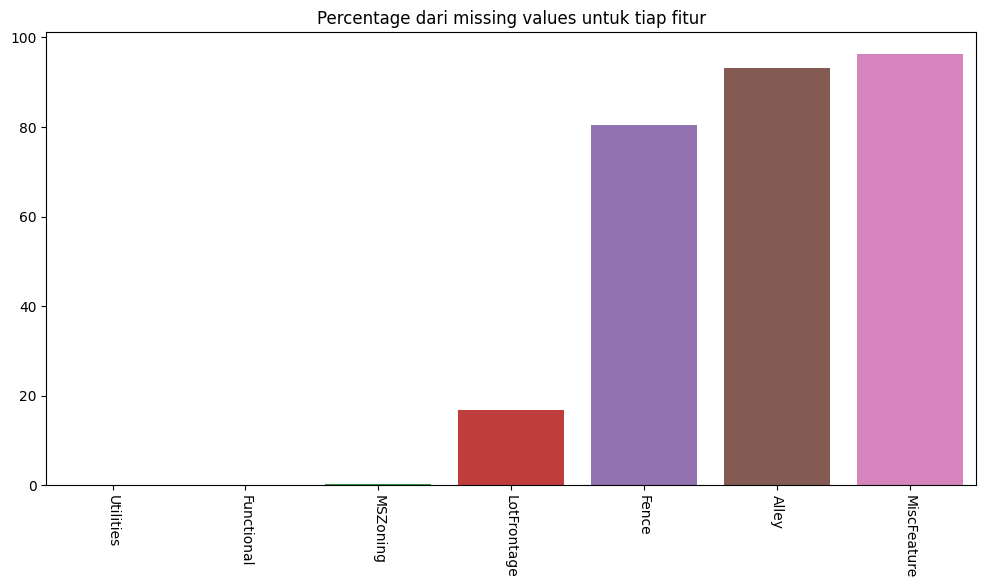

In [43]:
# Plotting hasil persentasi missing values untuk fitur tersisa
plt.figure(figsize=(12,6), dpi=100)
sns.barplot(x=null_perc(df).index, y=null_perc(df).values)
plt.title('Percentage dari missing values untuk tiap fitur')
plt.xticks(rotation=270);

****Features: MiscFeature, Fence, Alley, Utilities, Functional, MSZoning

In [44]:
# Miscellaneous feature not covered in other categories
df['MiscFeature'] = df['MiscFeature'].fillna('NA')

# Fence quality
df['Fence'] = df['Fence'].fillna('NA')

# Type of alley access to property
df['Alley'] = df['Alley'].fillna('NA')

# Type of utilities available
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])

# Home functionality
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])

# Identifies the general zoning classification of the sale
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

# Now the only column with null values is LotFrontage
print(f'Jumlah Missing Values Tersisa :\n\n{null_count(df)}')

Jumlah Missing Values Tersisa :

LotFrontage    486
dtype: int64


In [45]:
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,NA,NA,NA,0,2,2008,WD,Normal,208500.0,train
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,NA,NA,NA,0,5,2007,WD,Normal,181500.0,train
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,NA,NA,NA,0,9,2008,WD,Normal,223500.0,train
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0,train
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,NA,NA,NA,0,12,2008,WD,Normal,250000.0,train
5,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,Inside,...,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000.0,train
6,20,RL,75.0,10084,Pave,NA,Reg,Lvl,AllPub,Inside,...,NA,NA,NA,0,8,2007,WD,Normal,307000.0,train
7,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,Corner,...,NA,NA,Shed,350,11,2009,WD,Normal,200000.0,train
8,50,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,Inside,...,NA,NA,NA,0,4,2008,WD,Abnorml,129900.0,train
9,190,RL,50.0,7420,Pave,NA,Reg,Lvl,AllPub,Corner,...,NA,NA,NA,0,1,2008,WD,Normal,118000.0,train


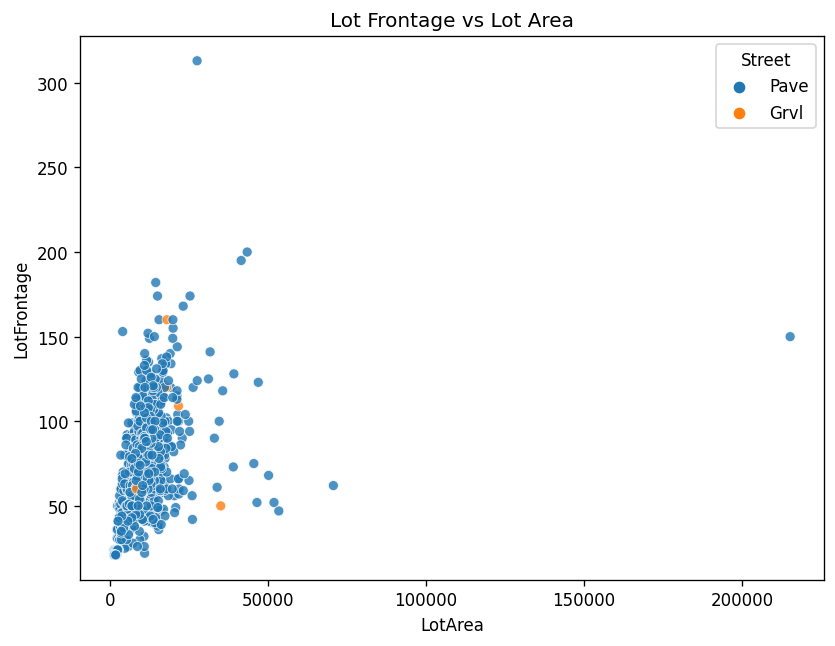

In [46]:
plt.figure(figsize=(8,6), dpi=120)
sns.scatterplot(data=df, x='LotArea', y='LotFrontage', hue='Street', alpha=0.8)
plt.title('Lot Frontage vs Lot Area');

In [47]:
df["LotFrontage"] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

# Should display empty array
print(f'Jumlah missing values tersisa :\n{null_count(df)}')

Jumlah missing values tersisa :
Series([], dtype: int64)


**Dummy Variables for Categorical Features**

In [48]:
#The df dataframe is split based on the "ind" column.
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

# Drop the 'ind' column as it is not needed.
test = test.drop('ind', axis=1)
train = train.drop('ind', axis=1)

# Splitting train data set into Features and Label
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

# The test data set contains the SalePrice column with NaN values due to concatenation that was done before.
# Now the SalePrice column can be droppped.
X_test = test.drop('SalePrice', axis=1)

X_train_enc = pd.get_dummies(X_train, drop_first=True)

X_test_enc = pd.get_dummies(X_test, drop_first=True)

print(f'Encoded X_train columns: {X_train_enc.shape[1]}')
print()
print(f'Encoded X_test columns: {X_test_enc.shape[1]}')

Encoded X_train columns: 259

Encoded X_test columns: 242


In [49]:
enc_train_cols = X_train_enc.columns.tolist()

X_test_enc = X_test_enc.reindex(columns=enc_train_cols).fillna(0)

print(f'Encoded X_train columns: {X_train_enc.shape[1]}')
print()
print(f'Encoded X_test columns: {X_test_enc.shape[1]}')

Encoded X_train columns: 259

Encoded X_test columns: 259


**PREDICTION**

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, GridSearchCV

In [51]:
# Model Definition
model = GradientBoostingRegressor()

# Cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Hyperparameters
n_est = [100, 500, 1000, 1500]
lr_rate = [0.02, 0.05, 0.1]
mx_depth = np.arange(2,7)
mx_feat = ['sqrt', 'log2']

params = {'n_estimators' : n_est, 'learning_rate' : lr_rate, 'max_depth' : mx_depth, 'max_features' : mx_feat}

# Grid Search CV
grid_gb = GridSearchCV(estimator=model, param_grid=params, cv=kfold, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Model fitting
grid_gb.fit(X_train_enc, y_train)

# Storing the results of GridSearchCV in a dataframe
cv_df = pd.DataFrame(grid_gb.cv_results_)
best = grid_gb.best_params_

print(f'Best Parameters: {best}')

print(f'Best Score (Negative RMSE): {grid_gb.best_score_}')

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 1000}
Best Score (Negative RMSE): -21365.725806727572


In [52]:
# Evaluation based on final Gradient Boosting model
final_model = GradientBoostingRegressor(learning_rate=best['learning_rate'], 
                                        max_features=best['max_features'],
                                        n_estimators=best['n_estimators'])

final_model.fit(X_train_enc, y_train)

predictions = final_model.predict(X_test_enc)

predictions = pd.DataFrame({'Id' : data_test['Id'], 'SalePrice' : predictions})

predictions.head()

,Id,SalePrice
0,1461,122224.050015
1,1462,158954.831665
2,1463,195555.842602
3,1464,193253.070410
4,1465,183669.827747


In [53]:
output = predictions.to_csv("submission_gb.csv", index=False)